# SETUP PRE-REQUISITES

In [1]:
import os
import platform
import sys

import tensorflow as tf
#from tensorflow.keras import layers

#import keras
from tensorflow import keras
from keras import layers
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.layers import Dense, Flatten, Input
from keras.models import Model

def escape():
    sys.exit()

2023-04-06 21:30:32.401312: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-06 21:30:32.527000: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-06 21:30:32.527669: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-06 21:30:33.525676: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tf.keras.__version__}")
print()
print(f"Python {sys.version}")

Python Platform: Linux-6.2.9-zen1-1-zen-x86_64-with-glibc2.37
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.9.16 (main, Mar  8 2023, 14:00:05) 
[GCC 11.2.0]


## Setup INFO level

In [3]:
tf.get_logger().setLevel('INFO')

#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

# MAIN CODE

In [4]:
import_directory = "/home/aryn/spectre-dev/dataset/ISCX-IDS-2012/PCAP-NPY/"
counter = 0
data_array = np.empty((0, 2))
files = os.listdir(import_directory)
for file in files:
    print('Opening File : ', file)
    data_set = np.load(import_directory+file,allow_pickle=True)
    data_array = np.vstack((data_array, data_set))

#separated = np.array([x for x in data_array if x[1] == 0])

Opening File :  destinationPayload_TestbedMonJun14Flows.xml.npy
Opening File :  destinationPayload_TestbedSatJun12Flows.xml.npy
Opening File :  destinationPayload_TestbedSunJun13Flows.xml.npy
Opening File :  destinationPayload_TestbedThuJun17-2Flows.xml.npy
Opening File :  destinationPayload_TestbedThuJun17-3Flows.xml.npy
Opening File :  destinationPayload_TestbedTueJun15-1Flows.xml.npy
Opening File :  destinationPayload_TestbedTueJun15-2Flows.xml.npy
Opening File :  destinationPayload_TestbedTueJun15-3Flows.xml.npy
Opening File :  destinationPayload_TestbedWedJun16-1Flows.xml.npy
Opening File :  destinationPayload_TestbedWedJun16-2Flows.xml.npy
Opening File :  destinationPayload_TestbedWedJun16-3Flows.xml.npy


In [5]:
#np.random.shuffle(separated)
np.random.shuffle(data_array)
print("ok")

ok


In [6]:
img_row = 50
img_col = 50

N = np.shape(data_array)[0]
train_test_split_percentage = 0.60 #Changed from 0.75

X_train = data_array[:int(N * train_test_split_percentage), 0]
X_test = data_array[int(N * train_test_split_percentage):, 0]

X_train = np.array([x.reshape(img_row, img_col, 3) for x in X_train])
X_test = np.array([x.reshape(img_row, img_col, 3) for x in X_test])

In [7]:
y_train = data_array[:int(N * train_test_split_percentage), 1]
y_test = data_array[int(N * train_test_split_percentage):, 1]

y_train = np.array([[x] for x in y_train])
y_test = np.array([[x] for x in y_test])

In [8]:
model_vgg19_conv = VGG19(include_top=False, weights='imagenet', input_shape=(img_col, img_row, 3))

2023-04-06 21:30:58.974286: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-06 21:30:58.986594: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


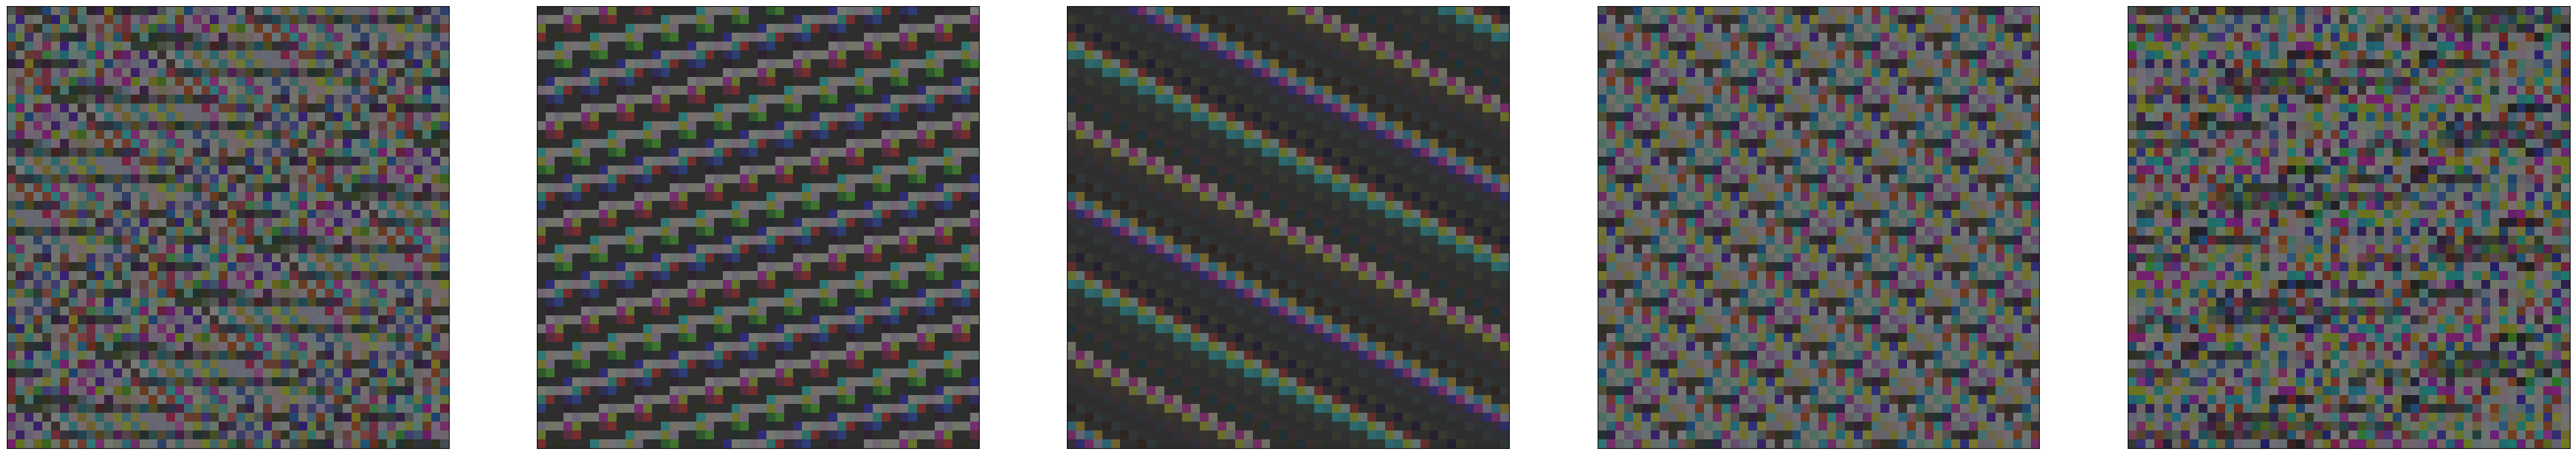

In [9]:
#ploting images for data
%matplotlib inline
n = 40  # how many digits we will display
plt.figure(figsize=(400, 150))
for i in range(6,11):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [10]:
for layer in model_vgg19_conv.layers:
    layer.trainable = False
    print(layer.name)

input_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


In [11]:
#x = model_vgg19_conv.output
#x = Flatten()(x)
#x = Dense(128, activation='relu')(x)
#x = Dense(1, activation='sigmoid', name='predictions')(x)
#my_model = Model(inputs=model_vgg19_conv.input, outputs=x)
#my_model.summary()

#Revision 1
#x = model_vgg19_conv.output
#x = Flatten()(x)
#x = Dense(128, activation='relu')(x)
#x = Dense(80, activation='relu')(x)
#x = Dense(1, activation='sigmoid', name='predictions')(x)
#my_model = Model(inputs=model_vgg19_conv.input, outputs=x)
#my_model.summary()

#Revision 2
x = model_vgg19_conv.output
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid', name='predictions')(x)
my_model = tf.keras.Model(inputs=model_vgg19_conv.input, outputs=x)
my_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [12]:
my_model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

batch_size = 10 #Changed from 32
epochs = 2

In [13]:
hist = my_model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_split=0.4) #Changed from 0.2

Epoch 1/2


2023-04-06 21:31:17.966237: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2167545000 exceeds 10% of free system memory.


28900/28901 [============================>.] - ETA: 0s - loss: 0.0489 - accuracy: 0.9893

2023-04-06 21:54:04.243261: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1445032500 exceeds 10% of free system memory.


28901/28901 [==============================] - 2217s 77ms/step - loss: 0.0488 - accuracy: 0.9893 - val_loss: 0.0386 - val_accuracy: 0.9906
Epoch 2/2
28901/28901 [==============================] - 2211s 77ms/step - loss: 0.0436 - accuracy: 0.9907 - val_loss: 0.0529 - val_accuracy: 0.9908


In [14]:
score = my_model.evaluate(X_test, y_test, verbose=0)

2023-04-06 22:45:07.770906: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2408385000 exceeds 10% of free system memory.


In [15]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.048505332320928574
Test accuracy: 0.9911527633666992


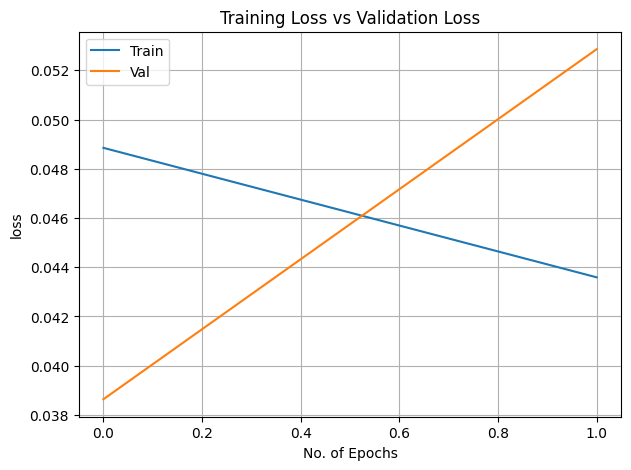

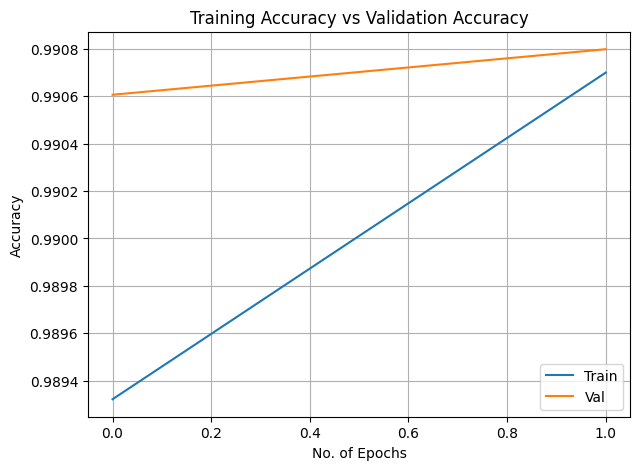

In [16]:
# training_loss= hist.history['loss']
# val_loss= hist.history['val_loss'] 
# training_acc= hist.history['acc'] 
# val_acc= hist.history['val_acc']
# xc=range(epochs)

# plt.figure(1,figsize=(7,5)) 
# plt.plot(xc,training_loss)
# plt.plot(xc,val_loss) 
# plt.xlabel('No. of Epochs') 
# plt.ylabel('loss') 
# plt.title('Training Loss vs Validation Loss') 
# plt.grid(True) 
# plt.legend(['Train','Val'])

# plt.figure(2,figsize=(7,5)) 
# plt.plot(xc,training_acc) 
# plt.plot(xc,val_acc) 
# plt.xlabel('No. of Epochs') 
# plt.ylabel('Accuracy') 
# plt.title('Training Accuracy vs Validation Accuracy') 
# plt.grid(True) 
# plt.legend(['Train','Val'],loc=4)

# Correction 
training_loss = hist.history['loss']
val_loss = hist.history['val_loss'] 
training_acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1, figsize=(7, 5)) 
plt.plot(xc, training_loss)
plt.plot(xc, val_loss) 
plt.xlabel('No. of Epochs') 
plt.ylabel('loss') 
plt.title('Training Loss vs Validation Loss') 
plt.grid(True) 
plt.legend(['Train', 'Val'])

plt.figure(2, figsize=(7, 5)) 
plt.plot(xc, training_acc) 
plt.plot(xc, val_acc) 
plt.xlabel('No. of Epochs') 
plt.ylabel('Accuracy') 
plt.title('Training Accuracy vs Validation Accuracy') 
plt.grid(True) 
plt.legend(['Train', 'Val'], loc=4)


total length =  321118
Anomolies =  15326
Normal =  305792


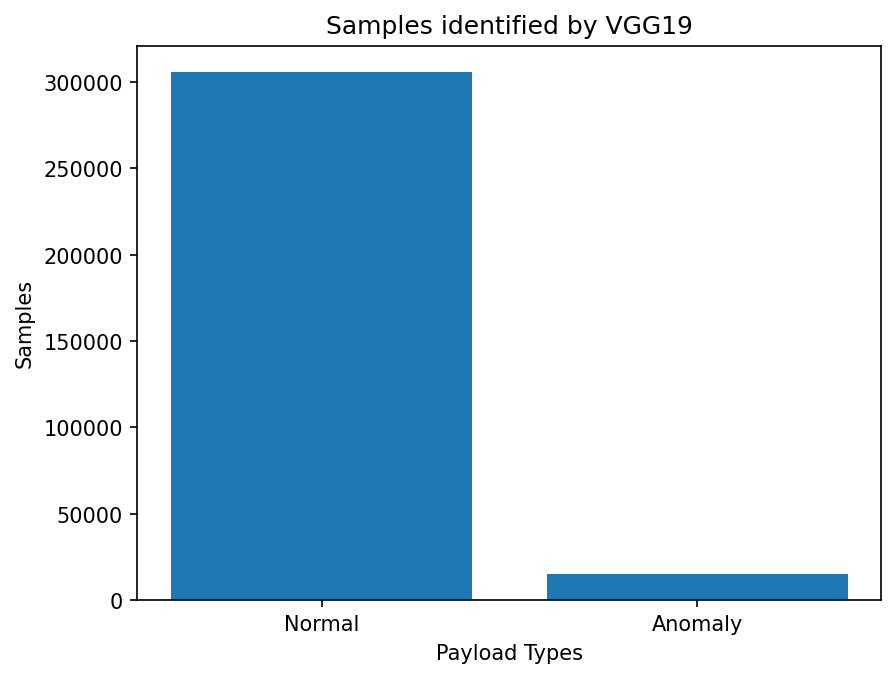

In [17]:
checking_occurences = [x for x in y_test if x == 1]
print("total length = ",len(y_test))
print("Anomolies = ",len(checking_occurences))
print("Normal = ", (len(y_test) - len(checking_occurences)))

n = len(y_test) - len(checking_occurences)
a = len(checking_occurences)

label = ['Normal', 'Anomaly']
samples = [n, a]

default_dpi = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = default_dpi * 1.5

# this is for plotting purpose
index = np.arange(len(label))
plt.bar(index, samples)
plt.xlabel('Payload Types', fontsize=10)
plt.ylabel('Samples', fontsize=10)
plt.xticks(index, label, fontsize=10, rotation=0)
plt.title('Samples identified by VGG19')
plt.show()

In [18]:
predictions = my_model.predict(X_test)
print("Predictions = ",predictions)

2023-04-06 23:04:47.889546: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2408385000 exceeds 10% of free system memory.


10035/10035 [==============================] - 1181s 118ms/step
Predictions =  [[1.0012685e-09]
 [1.4137768e-21]
 [2.9784686e-27]
 ...
 [9.9701714e-13]
 [9.1576958e-01]
 [1.0823097e-12]]


In [19]:
rounded = [[round(x[0])] for x in predictions]
from sklearn.metrics import f1_score
result = f1_score(y_test,rounded, average=None, labels = [0,1])
print("F1 = ",result)

F1 =  [0.99533734 0.91371823]


In [20]:
result = f1_score(y_test,rounded, average='macro')
print("F1 macro = ",result)

F1 macro =  0.9545277831583923


In [21]:
result = f1_score(y_test,rounded, average='micro')
print("F1 Micro = ",result)

F1 Micro =  0.9911527849575545


In [22]:
result = f1_score(y_test,rounded, average='weighted')
print("F1 Weighted = ",result)

F1 Weighted =  0.9914419052947376


In [23]:
import sklearn.metrics
target_names = ['normal','anomaly']
print(sklearn.metrics.classification_report(y_test,rounded,labels = [0,1], target_names=target_names))

              precision    recall  f1-score   support

      normal       1.00      0.99      1.00    305792
     anomaly       0.85      0.98      0.91     15326

    accuracy                           0.99    321118
   macro avg       0.93      0.99      0.95    321118
weighted avg       0.99      0.99      0.99    321118



In [25]:
my_model.save("/home/aryn/spectre-dev/spectre-code/spectre-ann/Model/DDOS/spectre_ddos_hd5.hd5")
my_model.save("/home/aryn/spectre-dev/spectre-code/spectre-ann/Model/DDOS/spectre_ddos_h5.h5")

INFO:tensorflow:Assets written to: /home/aryn/spectre-dev/spectre-code/spectre-ann/Model/DDOS/spectre_ddos_hd5.hd5/assets


INFO:tensorflow:Assets written to: /home/aryn/spectre-dev/spectre-code/spectre-ann/Model/DDOS/spectre_ddos_hd5.hd5/assets


In [40]:
from keras import activations
from read_activations import get_activations, display_activations
v_index= 4
x_valid = X_train[:5]
a = get_activations(my_model, x_valid[v_index:v_index+1], print_shape_only=True)
display_activations(a)

#from keract import get_activations, display_activations
#v_index= 4
#x_valid = X_train[:5]
#a = get_activations(my_model, x_valid[v_index:v_index+1], output_format='simple')
#display_activations(a)


ModuleNotFoundError: No module named 'read_activations'